# Exercises
We did the first 4 exercises.

## Setup
First, we have to set up the environment to meet all the requirements that are running the code needs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import stock_analysis
from stock_analysis.utils import group_stocks, describe_group

reader = stock_analysis.StockReader('2017-01-01', '2018-12-31')

# get bitcoin data
bitcoin = reader.get_bitcoin_data('USD')

# get faang data
fb, aapl, amzn, nflx, goog = (
    reader.get_ticker_data(ticker) \
    for ticker in ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

# get S&P 500 data
sp = reader.get_index_data('S&P 500')

faang = group_stocks(
    {
        'Facebook' : fb, 
        'Apple' : aapl, 
        'Amazon' : amzn, 
        'Netflix' : nflx, 
        'Google' : goog
    }
)

faang_sp = group_stocks(
    {
        'Facebook' : fb, 
        'Apple' : aapl, 
        'Amazon' : amzn, 
        'Netflix' : nflx, 
        'Google' : goog,
        'S&P 500' : sp
    }
)

bit_sp = group_stocks(
    {
        'Bitcoin' : bitcoin,
        'S&P 500' : sp
    }
)

all_assets = group_stocks(
    {
        'Bitcoin' : bitcoin,
        'S&P 500' : sp,
        'Facebook' : fb, 
        'Apple' : aapl, 
        'Amazon' : amzn, 
        'Netflix' : nflx, 
        'Google' : goog
    }
)

In [2]:
# To better show the result, ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

## Exercises 1:
Using the StockAnalyzer, calculate and plot three levels of support and resistance for Netflix's closing price from 2017-2018.

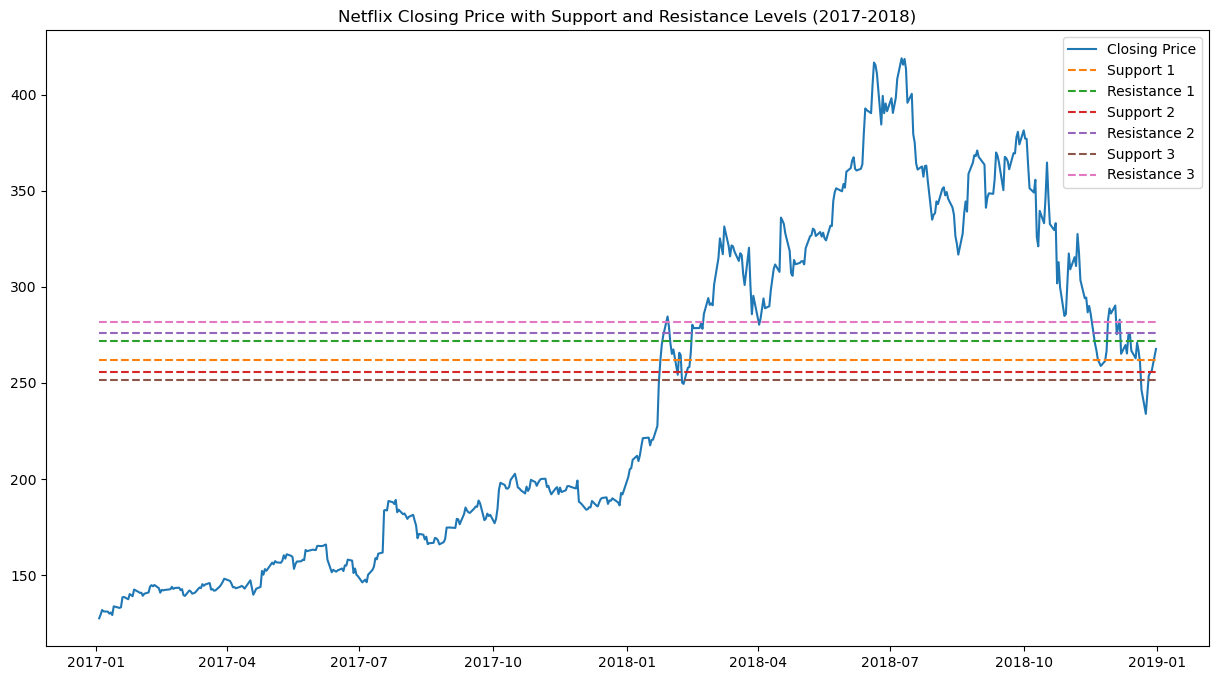

In [3]:
from stock_analysis import StockAnalyzer

# read in the CSV file as a Pandas DataFrame
nflx = pd.read_csv('ch_07/data/netflix.csv')

# convert date column to datetime index
nflx['date'] = pd.to_datetime(nflx['date'])
nflx = nflx.set_index('date')

# filter to only include data within 2017-2018
nflx_2017_2018 = nflx.loc['2017':'2018']

# create a StockAnalyzer object using the filtered DataFrame
analyzer = StockAnalyzer(nflx_2017_2018) 

# calculate support and resistance levels
support_levels = pd.DataFrame({
    'Support 1': [analyzer.support(1) for _ in nflx_2017_2018.index],
    'Support 2': [analyzer.support(2) for _ in nflx_2017_2018.index],
    'Support 3': [analyzer.support(3) for _ in nflx_2017_2018.index]
}, index=nflx_2017_2018.index)
resistance_levels = pd.DataFrame({
    'Resistance 1': [analyzer.resistance(1) for _ in nflx_2017_2018.index],
    'Resistance 2': [analyzer.resistance(2) for _ in nflx_2017_2018.index],
    'Resistance 3': [analyzer.resistance(3) for _ in nflx_2017_2018.index]
}, index=nflx_2017_2018.index)

# plot Netflix closing price with support and resistance levels
fig, ax = plt.subplots(figsize=(15, 8))

# plot closing price
ax.plot(nflx_2017_2018.index, nflx_2017_2018['close'], label='Closing Price')

# plot support and resistance levels
for i in range(1, 4):
    ax.plot(support_levels.index, support_levels[f'Support {i}'], label=f'Support {i}', linestyle='--')
    ax.plot(resistance_levels.index, resistance_levels[f'Resistance {i}'], label=f'Resistance {i}', linestyle='--')

ax.set_title("Netflix Closing Price with Support and Resistance Levels (2017-2018)")
ax.legend()
plt.show()

## Exercises 2
With the StockVisualizer, look at the effect of after-hours trading on the FAANG stocks:

### 2.1
As individual stocks

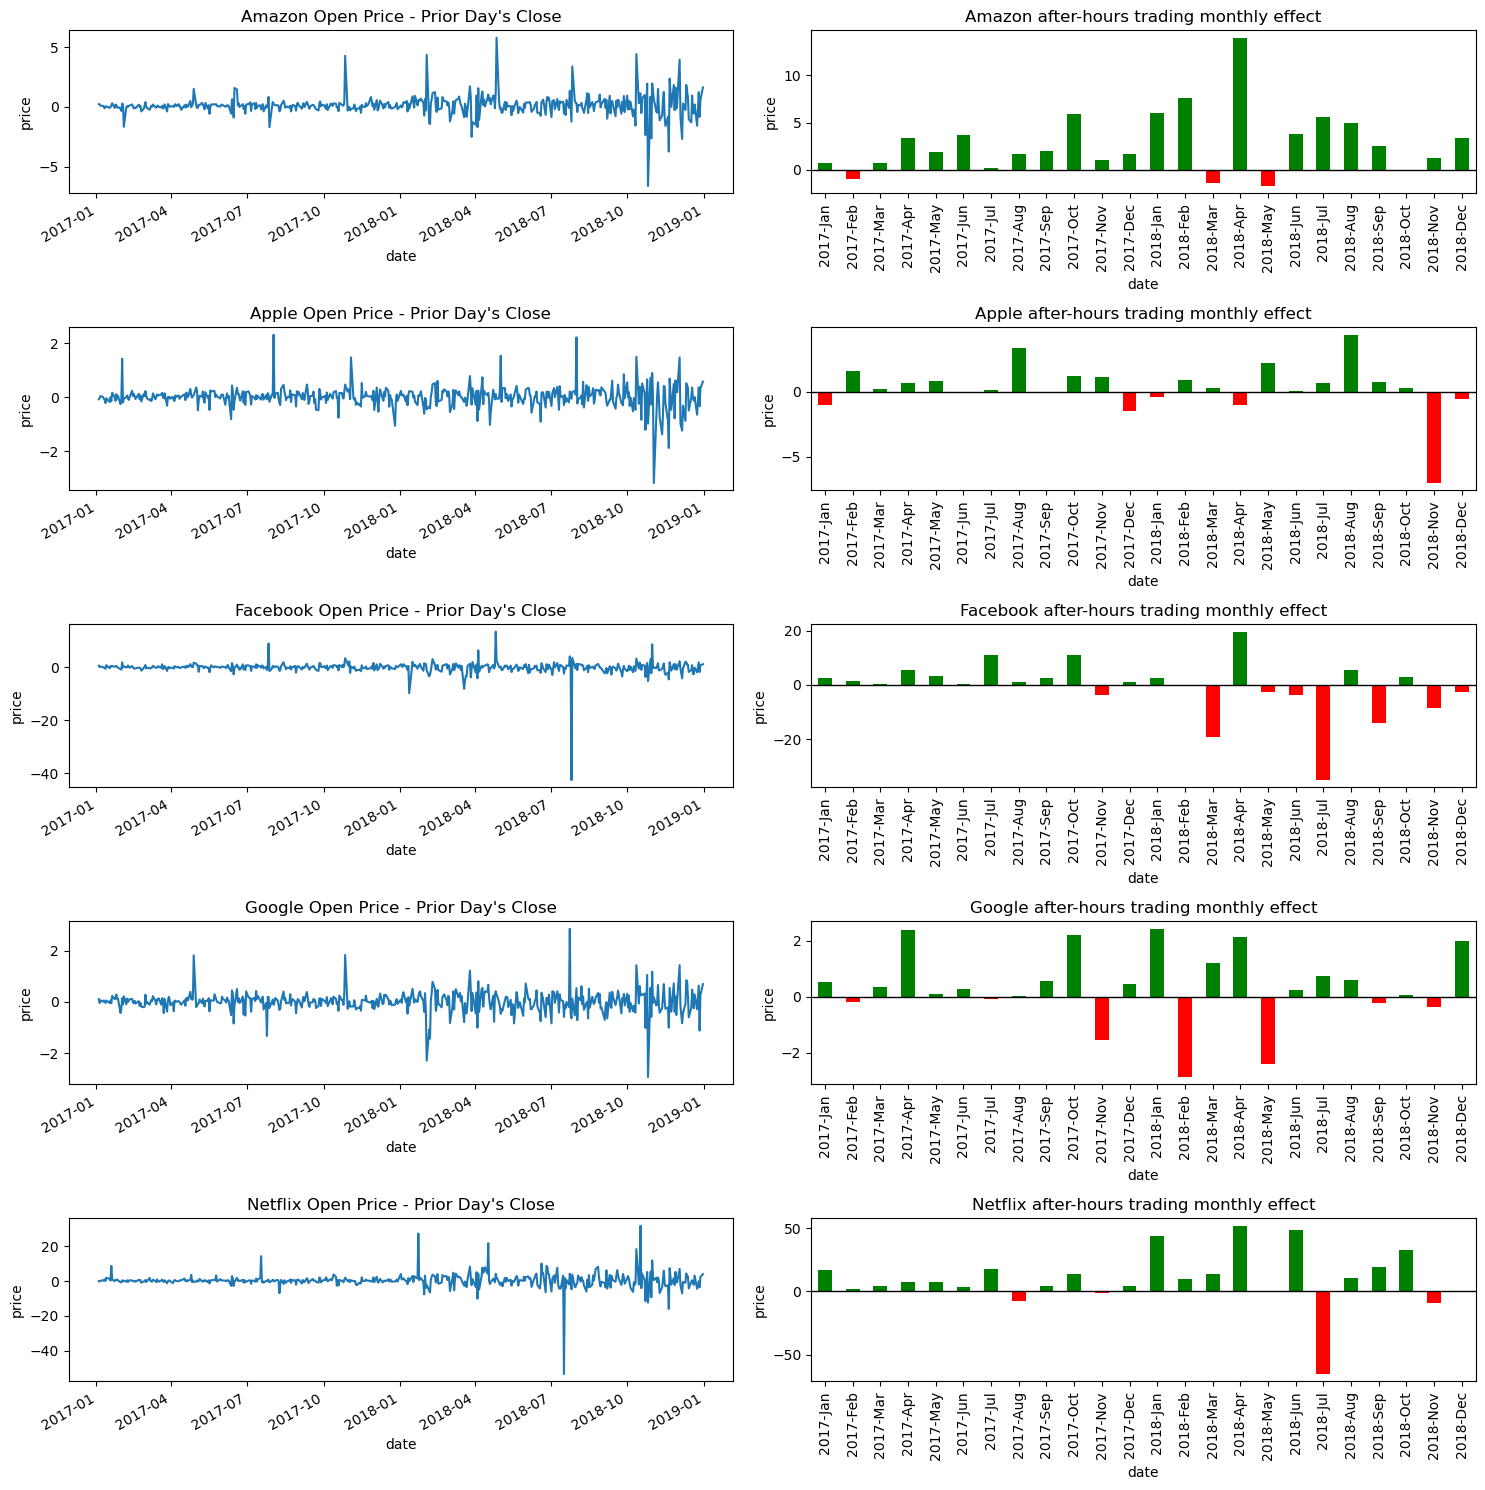

In [4]:
from stock_analysis import AssetGroupVisualizer
faang_viz = AssetGroupVisualizer(faang)
faang_viz.after_hours_trades()
plt.show()

### 2.2
As a portfolio using the make_portfolio() function from stock_analysis.utils (that we have already setup in first step).

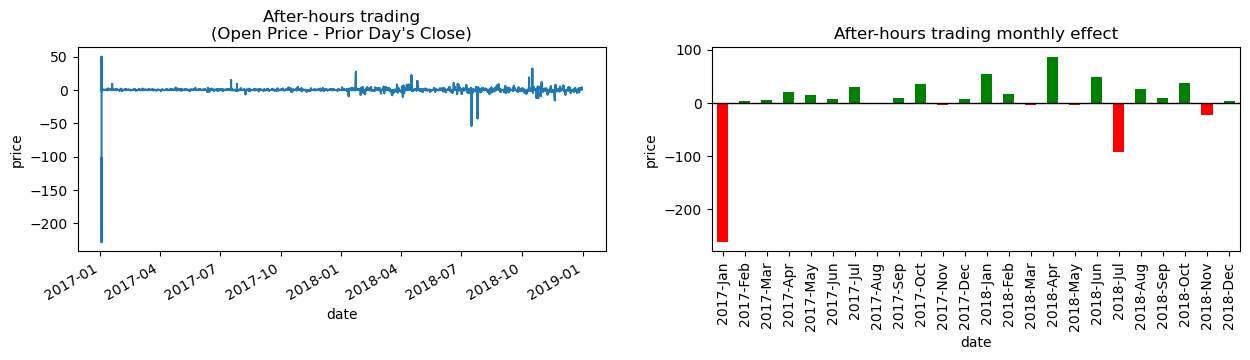

In [5]:
from stock_analysis import StockVisualizer
faang_viz = StockVisualizer(faang)
faang_viz.after_hours_trades()
plt.show()

## Exercises 3
### 3.1
Using the StockVisualizer.open_to_close() method, create a plot that fills the area between the FAANG stocks' opening price (as a portfolio) and its closing price each day in red if the price declined and in green if the price increased.

In [6]:
from stock_analysis.utils import make_portfolio
faang_portfolio = make_portfolio(faang)

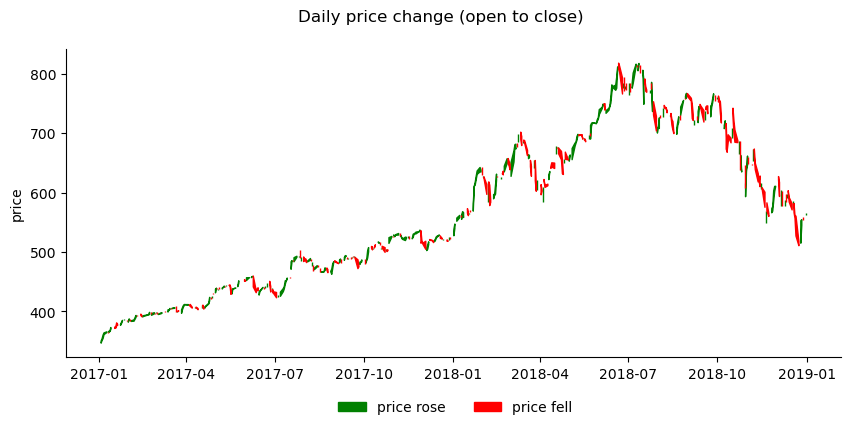

In [7]:
faang_portfolio_viz = StockVisualizer(faang_portfolio)
faang_portfolio_viz.open_to_close(figsize=(10,4))
plt.show()

### 3.2
As a bonus, do the same for a portfolio of bitcoin and the S&P 500

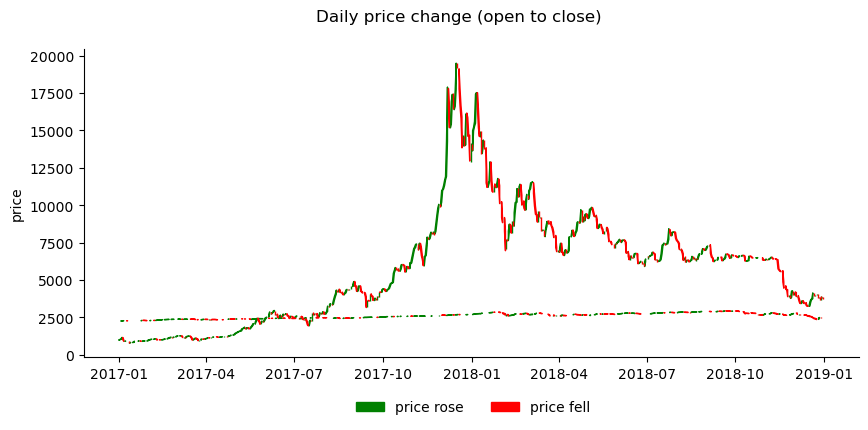

In [8]:
bit_sp_viz = StockVisualizer(bit_sp)
bit_sp_viz.open_to_close(figsize=(10,4))
plt.show()

## Exercise 4
Compare a mutual fund or ETF (Exchange Traded Fund) of your choice to 3 of its largest assets (by composition), using annualized volatility and the `AssetGroupAnalyzer`. These funds are built to mitigate risk, so volatility for the fund will be lower than that of the assets that compose it.

*Note: Solution uses the mutual fund FBALX, whose composition can be found at https://fundresearch.fidelity.com/mutual-funds/composition/316345206. Composition used for the solution taken on April 14, 2019.*

In [9]:
spy = reader.get_ticker_data('SPY')
msft = reader.get_ticker_data('MSFT')
mutual_fund = group_stocks({
    '0 - SPY' : spy,
    '1 - Microsoft' : msft,
    '2 - Apple' : aapl,
    '3 - Amazon' : amzn
})
stock_analysis.AssetGroupAnalyzer(mutual_fund).analyze(
    'annualized_volatility'
)

{'0 - SPY': 0.17102621577962138,
 '1 - Microsoft': 0.28236787017542164,
 '2 - Apple': 0.2870941266617102,
 '3 - Amazon': 0.36064939717790395}